<a href="https://colab.research.google.com/github/MtHenriqueF/GA-Rastrigin-1/blob/caso-base/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

WORKDIR = '/content/drive/MyDrive/GA'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/MyDrive/GA


---
# Enunciado

O problema para o segundo trabalho de GA é definido pela função Rastrigin [1] é uma função
não convexa usada como um problema de teste de desempenho para algoritmos de
otimização.

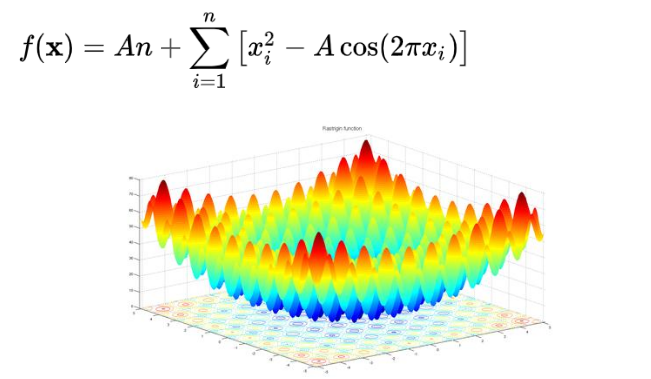

In [3]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


- **O objetivo é avaliar e testar todos os parâmetros do Algoritmo Genético para encontrar a função de mínimo para o problema no menor tempo possível, ou seja, com a menor quantidade de gerações.** O código em Python desenvolvido a partir da biblioteca *geneticalgorithm2* também está disponível.

- Fundamental, a inclusão de **tabelas que descrevam os parâmetros e valores avaliados desses parâmetros**, além dos resultados obtidos nos testes. Os **gráficos** devem ser anexados para justificar as respostas.

- Também recomendo que não alterem mais de um parâmetro por vez para evitar avaliações indevidas. Fundamental que façam comentários a respeito dos resultados obtidos!

---
# Informações sobre o trabalho

- Biblioteca do trabalho2
[geneticalgorithm2](https://pypi.org/project/geneticalgorithm2)

- Parâmetros do GA
[parametros-ga](https://github.com/PasaOpasen/geneticalgorithm2)


- Informação funções matemáticas
  - https://github.com/PasaOpasen/OptimizationTestFunctions#rastrigin
  - https://github.com/PasaOpasen/geneticalgorithm2

- Outra biblioteca de GA.
https://pypi.org/project/deap/

---
## Estrutura global do algoritmo - segundo biblioteca

```python
# Pre-process: making inner functions depends on params, making/loading start population

while True:

    if reason to stop (time is elapsed / no progress / generation count is reached / min value is reached):
        break


    select parents to crossover from last population and put them to new population:
        select (elit count) best samples
        select (parents count - elit count) random samples (by selection function)

    create (total samples count - parents count) children (samples from selected parents) and put them to new population:
        while not all children are created:
            select 2 random parents
            make child1, child2 from them using crossover
            mutate child1 by mutation (model.mut)
            mutate child2 by middle mutation (model.mut_middle)
            put children to new population
    
    remove duplicates, make revolutions, sort population by scores
    use callbacks, use middle callbacks

# Post-process: plotting results, saving
```

---
# Instalando dependências

In [4]:
!pip install geneticalgorithm2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 4.3 MB/s eta 0:00:00


In [5]:
!pip install geneticalgorithm2[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=7e9e18dad7738f4c48f53e4c1ca617e2761749bd252f772d948e042c87f569f5
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


---
# Interpretando enunciado e definindo os parâmetros essenciais

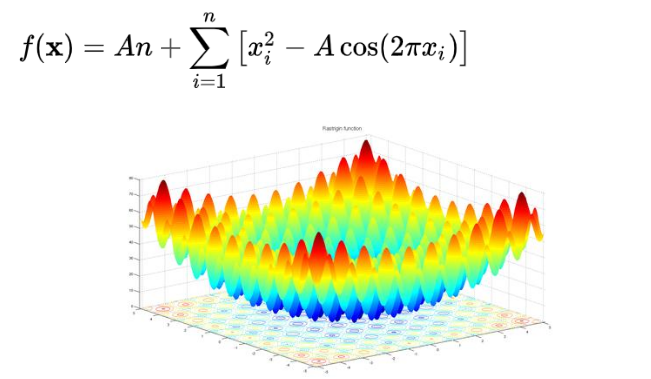

In [6]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


O enunciado pede para minimizar a funcão e o seu gráfico é 3D e F(x) tem dimensão 1A, então a dimensão de x é 2 ou seja, nossos cromossomos tem 2 'casas' reais.

Com base no enunciado e sabendo que x não tem restrições podemos também escrever a funcão que define a nossa avaliação, que será normalizada e virará aptidao.

O valor padrão e universalmente aceito para o parâmetro A na função de Rastrigin é 10. Portanto podemos definir a funcão de avaliação para nosso problema:


In [7]:
A = 10
n = 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga

A = 10

def rastrigin_function(X):
    n_dim = len(X)
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n_dim + termo_quadratico - termo_cosseno


Por definição x de [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)
varia entre [-5.12, 5.12] então já podemos definir varbound também


In [9]:
varbound = np.array([[-5.12, 5.12]] * n)

Além disso, variable_type='real', por definição também.


---
# Exemplificando com 1 experimento

Somento para efeitos de exemplificação da biblioteca geneticalgorithm2 para 1 experimento.

Iniciando o Algoritmo Genético...

Set: Average time of function evaluating (secs): 2.1582841873168947e-05 (total = 0.004316568374633789)

Best score before optimization: 1.6185229300034507
|||_________________ 15.0% GA is running...18 gen from 120...best value = 0.8371408694555882

/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [0.00994299 0.00255194]

 Objective function:
 0.020899283264188995

 Used generations: 120
 Used time: 1.63 seconds


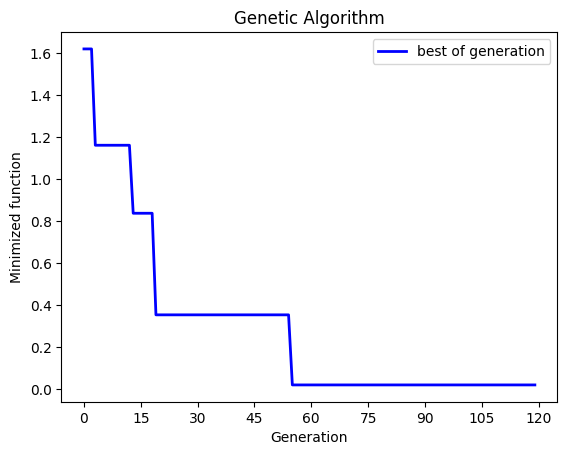

GAResult(last_generation=Generation(variables=array([[ 9.94299091e-03,  2.55193837e-03],
       [-1.32095956e-02,  9.52471297e-04],
       [ 9.94299091e-03,  9.92157263e-03],
       [-2.08199345e-02,  9.52471297e-04],
       [-1.32095956e-02, -2.21649923e-02],
       [ 9.94299091e-03,  2.68303286e-02],
       [-1.32095956e-02,  2.68303286e-02],
       [ 1.56161320e-02,  2.89917622e-02],
       [ 3.40943731e-02,  9.52471297e-04],
       [-3.68620042e-02,  2.55193837e-03],
       [ 9.94299091e-03,  4.11750535e-02],
       [-4.26248314e-02,  2.55193837e-03],
       [ 3.40943731e-02,  2.89917622e-02],
       [-4.07472218e-02, -2.21649923e-02],
       [-4.26248314e-02, -2.21649923e-02],
       [ 9.94299091e-03, -4.90163618e-02],
       [ 9.94299091e-03, -4.93623592e-02],
       [-4.26248314e-02,  2.68303286e-02],
       [ 1.56161320e-02, -4.90163618e-02],
       [-4.26248314e-02,  2.89917622e-02],
       [-1.83708546e-02, -4.90163618e-02],
       [ 5.48259304e-02,  2.89917622e-02],
       [

In [10]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from geneticalgorithm2 import Selection

A = 10
n = 2

varbound = np.array([[-5.12, 5.12]] * n)

# CONFIGURAÇÃO DOS PARÂMETROS DO ALGORITMO GENÉTICO

algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

model = ga(
    dimension=n,
    variable_type='real',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param,
    function=rastrigin_function
)

#Executando o algoritmo genético
#O parâmetro para remover duplicatas é passado no método run()

print("Iniciando o Algoritmo Genético...")
model.run(
    remove_duplicates_generation_step=1 #Remove duplicatas a cada 1 geração ("Sem duplicatas")
)



### valor de $(x, y, f(x,y))$ para melhor solução

In [11]:

solution = model.result

print(f"Melhor Score (Valor da Função): {solution.score}")
print(f"Melhor Solução (Vetor X): {solution.variable}")


Melhor Score (Valor da Função): 0.020899283264188995
Melhor Solução (Vetor X): [0.00994299 0.00255194]


### Solução para cada geração e o melhor resultado

In [12]:
solution

GAResult(last_generation=Generation(variables=array([[ 9.94299091e-03,  2.55193837e-03],
       [-1.32095956e-02,  9.52471297e-04],
       [ 9.94299091e-03,  9.92157263e-03],
       [-2.08199345e-02,  9.52471297e-04],
       [-1.32095956e-02, -2.21649923e-02],
       [ 9.94299091e-03,  2.68303286e-02],
       [-1.32095956e-02,  2.68303286e-02],
       [ 1.56161320e-02,  2.89917622e-02],
       [ 3.40943731e-02,  9.52471297e-04],
       [-3.68620042e-02,  2.55193837e-03],
       [ 9.94299091e-03,  4.11750535e-02],
       [-4.26248314e-02,  2.55193837e-03],
       [ 3.40943731e-02,  2.89917622e-02],
       [-4.07472218e-02, -2.21649923e-02],
       [-4.26248314e-02, -2.21649923e-02],
       [ 9.94299091e-03, -4.90163618e-02],
       [ 9.94299091e-03, -4.93623592e-02],
       [-4.26248314e-02,  2.68303286e-02],
       [ 1.56161320e-02, -4.90163618e-02],
       [-4.26248314e-02,  2.89917622e-02],
       [-1.83708546e-02, -4.90163618e-02],
       [ 5.48259304e-02,  2.89917622e-02],
       [

---
# Generalizando o algoritmo genético para n experimentos

Para n experimento o essencial é descobrir o melhor de cada geração de cada experimento, com isso conseguimos decidir qual hiperparametrização utilizar ao final.

A funcão abaixo será utilizada nas outras configurações de hiperâparametro também. Ela funciona para generalizar o código retornando um tabela pandas com os melhores indivíduos por geração em cada experimento. Isso será útil para plotar os gráficos e decidir qual configuração usar na hora de podar o número de gerações.

In [13]:

def executar_experimentos(algorithm_param, n_dim, num_experimentos=10):
    """
    Executa o Algoritmo Genético várias vezes e retorna os resultados em uma tabela pandas.
    """
    resultados_dict = {}
    varbound = np.array([[-5.12, 5.12]] * n_dim)

    print(f"Iniciando bateria de {num_experimentos} experimentos com dimensão n={n_dim}...")

    for i in range(1, num_experimentos + 1):

        model = ga(
            dimension=n_dim,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param,
        )

        model.run(
            function=rastrigin_function,
            remove_duplicates_generation_step=1,
            no_plot=True,
            progress_bar_stream=None,
            disable_printing=True
        )

        resultados_dict[f"Experimento_{i}"] = model.report


    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"

    return df_resultados

funcao de plotagem dos gráficos de
1. Média do Melhor Valor de f(x) por Geração
2. Box Plot do Melhor Valor de f(x) por Geração

In [14]:
def plotar_resultados_experimentos(df_resultados, titulo_experimento):
    """
    Gera dois gráficos (média e box plot) a partir de uma tabela de resultados.

    Args:
        df_resultados (pd.DataFrame): A tabela com gerações nas linhas e experimentos nas colunas.
        titulo_experimento (str): Um título descritivo para a configuração testada.
    """

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

    # --- Gráfico 1: Média do Melhor Valor de f(x) por Geração ---
    media_por_geracao = df_resultados.mean(axis=1)

    ax1.plot(media_por_geracao.index, media_por_geracao.values, marker='o', linestyle='-')
    ax1.set_title('Média do Melhor Valor de f(x) por Geração', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.grid(True)

    # --- Gráfico 2: Box Plot do Melhor Valor de f(x) por Geração ---
    geracoes_para_plotar = df_resultados.iloc[::5, :]

    ax2.boxplot(geracoes_para_plotar.transpose())
    ax2.set_title('Box Plot do Melhor Valor de f(x) (a cada 5 gerações)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)

    ax2.set_xticks(
        ticks=np.arange(1, len(geracoes_para_plotar) + 1),
        labels=geracoes_para_plotar.index,
        rotation=45
    )
    ax2.grid(True, linestyle='--', alpha=0.6)

    fig.suptitle(f'Resultados para o Teste: "{titulo_experimento}"', fontsize=18)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o supertítulo caber
    plt.show()


---
# Algoritmo genético - **configuração 1** (caso base)
Será utilizado a configuração dos hiperparâmetros do GA como:
```python
algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

# A remoção de duplicatas está incluída também porém se encontra em model.run()

Iniciando bateria de 10 experimentos com dimensão n=2...


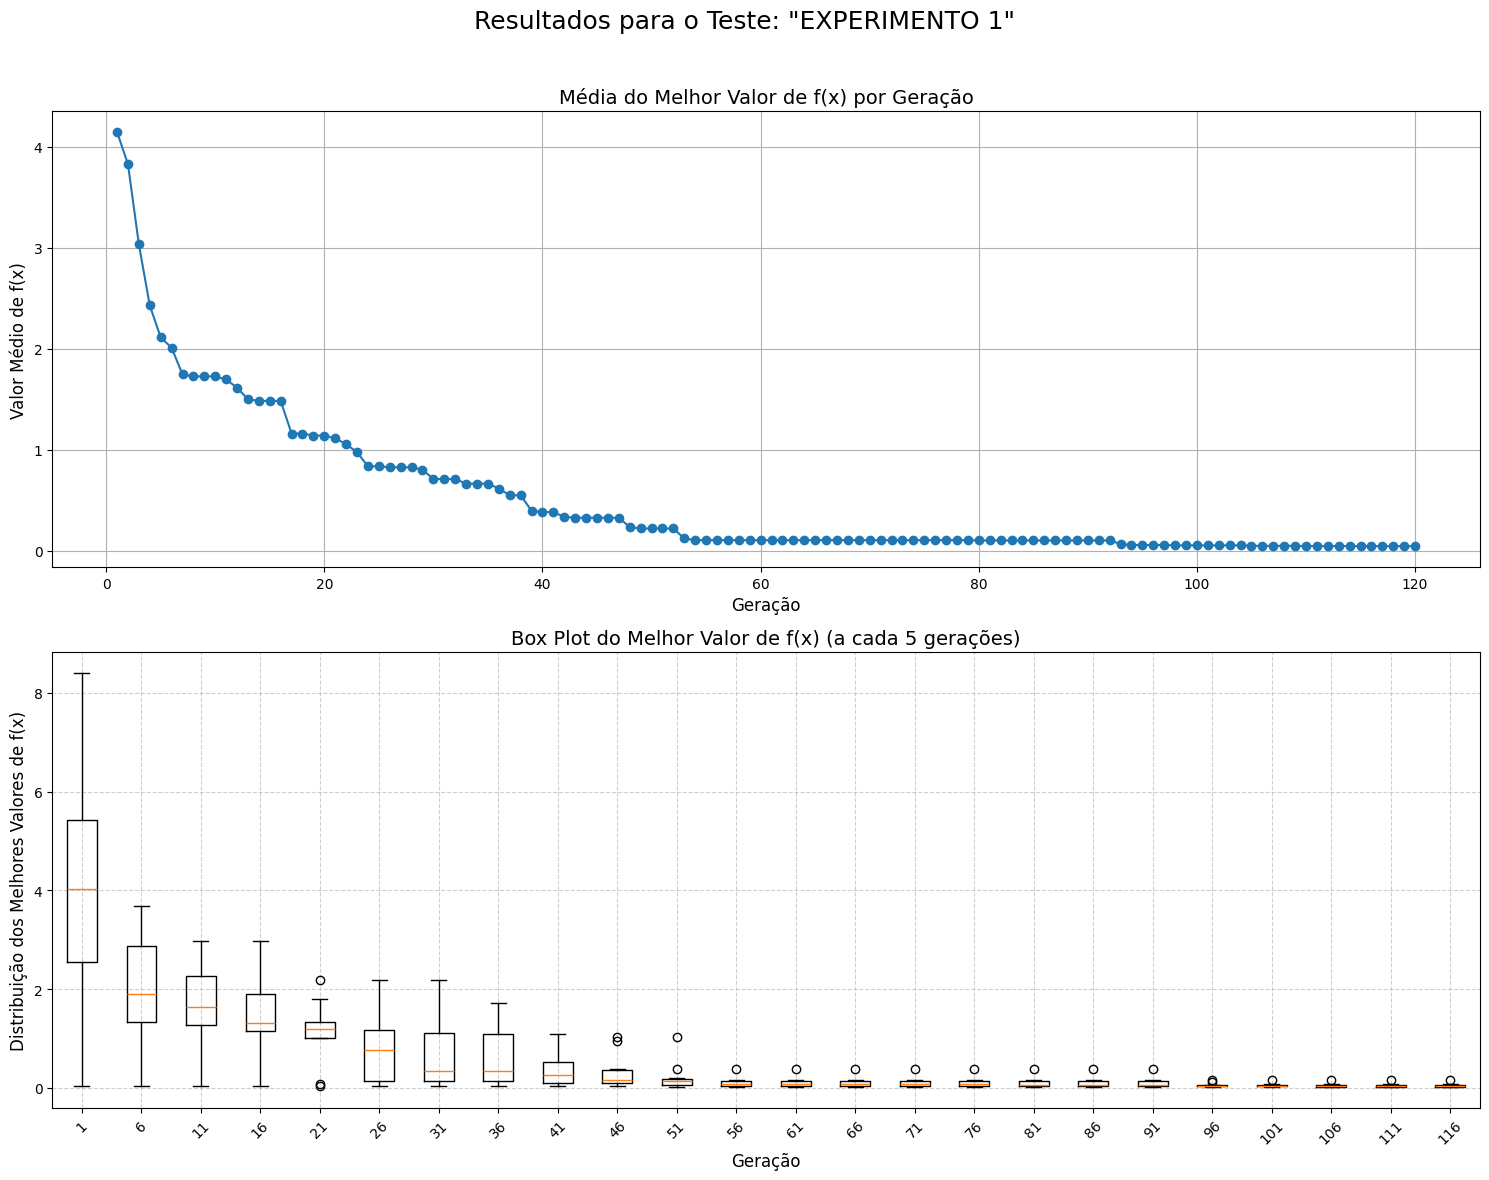

In [15]:
n_dimensao = 2
num_execucoes = 10

algorithm_param = {
    'max_num_iteration': 120,
    'population_size': 200,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}

tabela_resultados = executar_experimentos(
    algorithm_param=algorithm_param,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

plotar_resultados_experimentos(tabela_resultados, "EXPERIMENTO 1")



In [16]:
tabela_resultados

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10
Geração,,,,,,,,,,
1,8.399438,0.037264,7.891580,1.109941,2.386885,4.131366,5.045595,3.925535,3.003339,5.539304
2,6.501421,0.037264,6.715159,1.109941,2.279420,4.131366,5.045595,3.925535,3.003339,5.539304
3,1.566463,0.037264,5.387344,1.109941,2.279420,2.458267,5.045595,3.925535,3.003339,5.539304
4,1.566463,0.037264,5.322081,1.109941,2.279420,2.458267,3.058122,3.925535,3.003339,1.533401
5,1.566463,0.037264,3.221911,1.109941,2.279420,2.458267,2.247820,3.677215,3.003339,1.533401
...,...,...,...,...,...,...,...,...,...,...
116,0.051139,0.029760,0.010823,0.026361,0.059026,0.021522,0.079781,0.156945,0.010092,0.016678
117,0.051139,0.029760,0.010823,0.026361,0.059026,0.021522,0.079781,0.156945,0.010092,0.016678
118,0.051139,0.029760,0.010823,0.026361,0.059026,0.021522,0.079781,0.156945,0.010092,0.016678
